In [25]:
import strawberryfields as sf
from strawberryfields.ops import *
from strawberryfields.utils import scale
from numpy import pi, sqrt
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## Built in cat state

/Users/ryunagai/.pyenv/versions/3.6.5/envs/main_env/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure


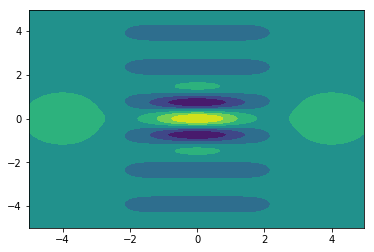

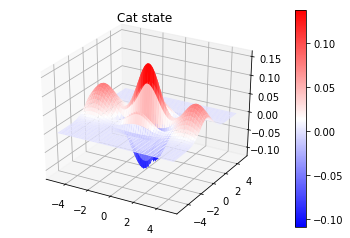

In [42]:
eng, q = sf.Engine(1)

alpha = 2
p = 0 # 0: even, 1: odd

with eng:
    Catstate(alpha = alpha, p = p)  | q[0]

state = eng.run('fock', cutoff_dim=50)
lim = 5

x = np.arange(-1*lim, lim, 0.05)
p = np.arange(-1*lim, lim, 0.05)

W = state.wigner(0, x, p)
X, P = np.meshgrid(x, p)
plt.contourf(X, P, W)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, P, W, cmap='bwr', linewidth=0)
fig.colorbar(surf)
ax.set_title("Cat state")
fig.show()

## Approximated cat state with single photon and squeezing

odd cat state は$\alpha < 1.2$であればSingle Photon StateをSqueezeすることで近似できる。  
また、Squeezed vacuum stateからphoton を1つ抜き取った状態はSqueezed Single Photon Stateと等価  
"Shrodinger Cat States for Quantum Information Processing"

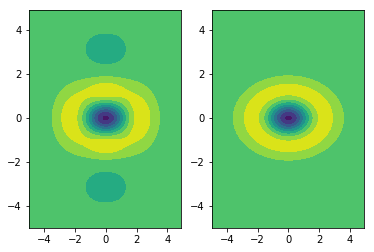

In [3]:
eng, q = sf.Engine(2)

N = 1
s = - 0.313

with eng:
    Catstate(alpha = N, p = 1)  | q[0]
    Fock(1) | q[1]
    Sgate(s) | q[1]

state = eng.run('fock', cutoff_dim=50)
lim = 5

x = np.arange(-1*lim, lim, 0.1)
p = np.arange(-1*lim, lim, 0.1)

W = state.wigner(0, x, p)
X, P = np.meshgrid(x, p)
plt.subplot(1, 2, 1)
plt.contourf(X, P, W)

W1 = state.wigner(1, x, p)
plt.subplot(1, 2, 2)
plt.contourf(X, P, W1)

## Amplification of cat state

それぞれ$\pm \alpha, \pm \beta$のCat stateを2つ用意すると、$\sqrt{\alpha^2 + \beta^2}$ のcat stateを確率的に作れる。  
例ではsqueezed single photon state で近似したodd cat state($\alpha=1$) を2つ用意し、下記論文のスキームに沿って$\alpha=\sqrt{2}$のeven cat stateを生成した。  
Homodyne 測定でpost selectionを行っている。

arXiv:quant-ph/0401001

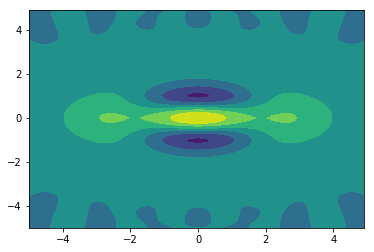

In [10]:
eng, q = sf.Engine(3)

s = - 0.313 # squeezing parameter

# When <squeezing parameter = -0.313>, squeezed single photon states approximately  become cat states with <amplitude = 1>
alpha = 1
beta = 1
gamma = 2 * alpha * beta / np.sqrt(alpha**2 + beta**2)
theta = np.arctan(alpha / beta)

with eng:
    # produce approximated odd cat states (squeezed single photon states)
    Fock(1) | q[0]
    Sgate(s) | q[0]
    Fock(1) | q[1]
    Sgate(s) | q[1]
    
    # prepare coherent state
    Coherent(gamma) | q[2]
    
    # interaction
    BSgate(theta) | q[0:2]
    BSgate(np.pi / 4) | q[1:3]
    
    # conditional measurement
    MeasureHomodyne(0, select = np.real(alpha)) | q[1]
    MeasureHomodyne(0, select = -np.real(alpha)) | q[2]

state = eng.run('fock', cutoff_dim=20)
lim = 5

x = np.arange(-1*lim, lim, 0.1)
p = np.arange(-1*lim, lim, 0.1)

W = state.wigner(0, x, p)
X, P = np.meshgrid(x, p)
plt.contourf(X, P, W)

上記メソッドの確認用に、strawberry fields組み込みの関数で$\alpha=\sqrt{2}$のcat stateを生成

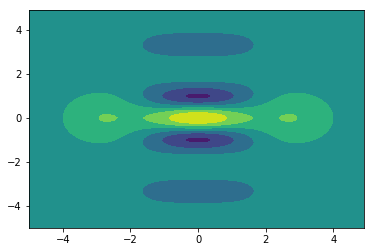

In [8]:
eng, q = sf.Engine(1)

with eng:
    Catstate(alpha = np.sqrt(2)) | q[0]

state = eng.run('fock', cutoff_dim=20)
lim = 5

x = np.arange(-1*lim, lim, 0.1)
p = np.arange(-1*lim, lim, 0.1)

W = state.wigner(0, x, p)
X, P = np.meshgrid(x, p)
plt.contourf(X, P, W)

Cavity QEDにおいて、原子がCavity modeと共鳴/非共鳴する状態の重ね合わせを利用すると、$\alpha = 3.4$の大きなcat stateを90%のfidelityで作れる。Fidelityが落ちる理由は、共鳴/非共鳴で波面が異なる歪方をするから、らしい。

## Cat state with cross-Kerr nonlinearity

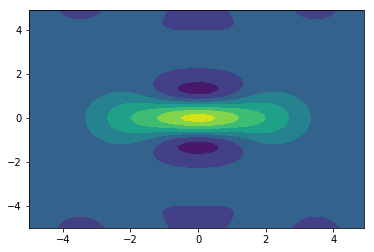

In [71]:
eng, q = sf.Engine(3)

alpha = 1
kappa = np.pi

with eng:
    Fock(1) | q[0]
    Vacuum() | q[1]
    Coherent(alpha) | q[2]    
    
    BSgate(np.pi / 4) | q[0:2]
    
    CKgate(kappa) | q[1:3]
    BSgate(np.pi / 4) | [q[0], q[1]]
    MeasureFock(select = 1) | q[1]
    #MeasureFock(select = 1) | q[0]

state = eng.run('fock', cutoff_dim=10)
lim = 5

x = np.arange(-1*lim, lim, 0.1)
p = np.arange(-1*lim, lim, 0.1)

W = state.wigner(2, x, p)
X, P = np.meshgrid(x, p)
plt.contourf(X, P, W)

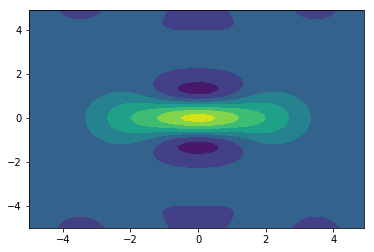

In [72]:
eng, q = sf.Engine(1)

with eng:
    Catstate(alpha = 1, p = 0) | q[0]

state = eng.run('fock', cutoff_dim=10)
lim = 5

x = np.arange(-1*lim, lim, 0.1)
p = np.arange(-1*lim, lim, 0.1)

W = state.wigner(0, x, p)
X, P = np.meshgrid(x, p)
plt.contourf(X, P, W)

## Coherent State

/Users/ryunagai/.pyenv/versions/3.6.5/envs/main_env/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: `factorial` is deprecated!
Importing `factorial` from scipy.misc is deprecated in scipy 1.0.0. Use `scipy.special.factorial` instead.


Text(0,0.5,'coefficient')

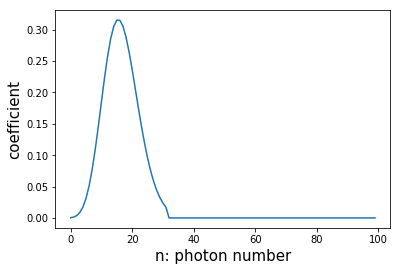

In [65]:
from scipy.misc import factorial
alpha = 4
n = np.arange(100)

p = np.exp(- np.abs(alpha)**2 / 2) * alpha**n / np.sqrt(factorial(n))

plt.plot(p)
plt.xlabel('n: photon number', fontsize = 15)
plt.ylabel('coefficient', fontsize = 15)